In [39]:
import tensorflow as tf

# Introduction

We will start with a digit recognition problem, where an image of a handwritten digit is provided and we are building a simple neural network at the start consisting of only input and output layers which we will increase eventually with a hidden layer of neurons to check performance.

There are 10 output neurons (0-9) and (n*n) input.

# Image to input

To bring an image to the format of a typical input for a neural network, we assign a value to every image pixel between 0 and 255 (Based on black to white).

Then we need to flatten the 2 dimensional array (nxn grid) into a 1 dimensional vector.

In starting, we will use 28x28 grid -> 784 neurons in input layer and 10 in output.

In [40]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train[0].shape

(28, 28)

In [41]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

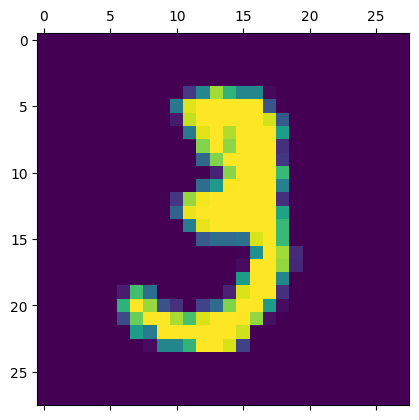

In [42]:
plt.matshow(X_train[10])

In [43]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [44]:
len(X_train)

60000

# Scaling the values of matrix from 0-255 to 0-1

In [45]:
X_train = X_train / 255
X_test = X_test / 255

print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

## Flatten of X_train and test

In [46]:
X_train_flatten = X_train.reshape(len(X_train), 28*28)
X_test_flatten = X_test.reshape(len(X_test), 28*28)

print(X_train_flatten.shape)
print(X_test_flatten.shape)

(60000, 784)
(10000, 784)


In [47]:
X_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Sequential

-> means that there is a stack of neuron layers and we will be giving each layer as a separate element.

## Dense

-> means that every neuron in 1 layer is connected with each neuron of the next layer.

## Optimiser

-> They allow you to train efficiently, during backward propagation when training is going on, the optimisers will help you reach global optima efficiently. (More of this after)

## Loss functions

-> From documentation

In [49]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['Accuracy']
)

model.fit(X_train_flatten, y_train, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 320us/step - Accuracy: 0.8055 - loss: 0.7373
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 318us/step - Accuracy: 0.9133 - loss: 0.3114
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 319us/step - Accuracy: 0.9196 - loss: 0.2862
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 311us/step - Accuracy: 0.9230 - loss: 0.2708
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 316us/step - Accuracy: 0.9254 - loss: 0.2690
